In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [3]:
#df.reset_index(inplace=True)
df = pd.read_csv('AAPL.csv')

In [4]:
#Get the number of rows and columns
df.shape

(1258, 7)

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,111.389999,111.440002,107.349998,109.330002,99.945885,53204600
1,2015-01-05,108.290001,108.650002,105.410004,106.250000,97.130241,64285500
2,2015-01-06,106.540001,107.430000,104.629997,106.260002,97.139420,65797100
3,2015-01-07,107.199997,108.199997,106.699997,107.750000,98.501518,40105900
4,2015-01-08,109.230003,112.150002,108.699997,111.889999,102.286186,59364500
...,...,...,...,...,...,...,...
1253,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.831299,12119700
1254,2019-12-26,284.820007,289.980011,284.700012,289.910004,288.442780,23280300
1255,2019-12-27,291.119995,293.970001,288.119995,289.799988,288.333313,36566500
1256,2019-12-30,289.459991,292.690002,285.220001,291.519989,290.044617,36028600


Text(0, 0.5, 'Close Price (USD)')

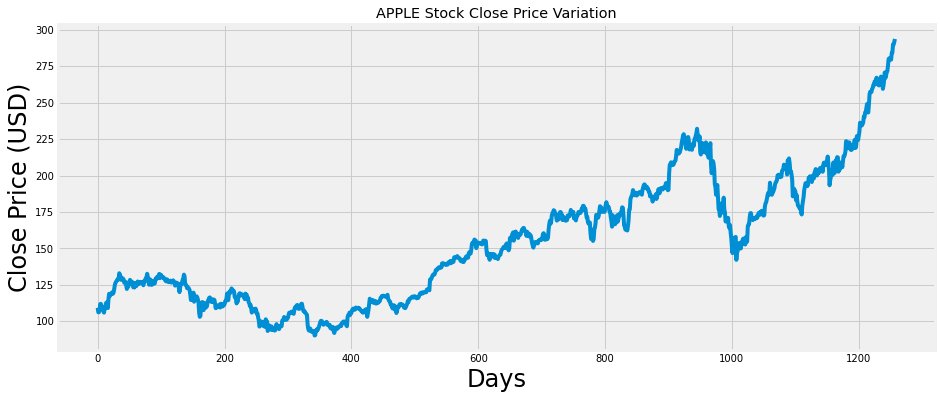

In [6]:
#Visualize the closing price history
plt.figure( figsize=(14,6))
plt.title('APPLE Stock Close Price Variation')
plt.plot(df['Close'])
plt.xlabel('Days', fontsize=24)
plt.ylabel('Close Price (USD)', fontsize=24)
#plt.show()


In [7]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len 

1007

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.09340419],
       [0.0782549 ],
       [0.0783041 ],
       ...,
       [0.98106337],
       [0.98952336],
       [1.        ]])

In [9]:
#Create the Training Dataset

#Create the Scaled Training Dataset
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_tarin sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.09340419, 0.0782549 , 0.0783041 , 0.0856328 , 0.10599579,
       0.10658603, 0.09301069, 0.09778174, 0.09571594, 0.0810585 ,
       0.07697606, 0.09040384, 0.09448629, 0.10850429, 0.11135708,
       0.11194728, 0.09246964, 0.12281738, 0.14047517, 0.13191682,
       0.13914712, 0.13924552, 0.14372142, 0.14559051, 0.14062272,
       0.14450841, 0.15582117, 0.16988835, 0.17765975, 0.18070929,
       0.18439824, 0.18877579, 0.18744775, 0.19261229, 0.20982738,
       0.20574493, 0.18912005, 0.19713739, 0.18749698, 0.19059564,
       0.19192369, 0.1878904 , 0.17741384, 0.17834835, 0.18100439,
       0.1680685 , 0.15690326, 0.16777336, 0.16354336, 0.17023266,
       0.18051254, 0.18754614, 0.18277509, 0.17490535, 0.1813487 ,
       0.17879104, 0.16251046, 0.16674046, 0.16187106, 0.17721709])]
[0.16767500041980238]

[array([0.09340419, 0.0782549 , 0.0783041 , 0.0856328 , 0.10599579,
       0.10658603, 0.09301069, 0.09778174, 0.09571594, 0.0810585 ,
       0.07697606, 0.09040384, 0.09

In [10]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [11]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(947, 60, 1)

In [12]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
947/947 [==============================] - 6s 6ms/step - loss: 3.2619e-04
Epoch 2/20
947/947 [==============================] - 6s 6ms/step - loss: 3.1401e-04
Epoch 3/20
947/947 [==============================] - 6s 7ms/step - loss: 3.4672e-04
Epoch 4/20
947/947 [==============================] - 10s 10ms/step - loss: 2.8937e-04
Epoch 5/20
947/947 [==============================] - 6s 6ms/step - loss: 2.8574e-04
Epoch 6/20
947/947 [==============================] - 6s 6ms/step - loss: 2.6819e-04
Epoch 7/20
947/947 [==============================] - 6s 6ms/step - loss: 2.7603e-04
Epoch 8/20
947/947 [==============================] - 6s 7ms/step - loss: 2.5562e-04
Epoch 9/20
947/947 [==============================] - 9s 10ms/step - loss: 2.7284e-04
Epoch 10/20
947/947 [==============================] - 6s 6ms/step - loss: 2.4736e-04
Epoch 11/20
947/947 [==============================] - 6s 6ms/step - loss: 2.4012e-04
Epoch 12/20
947/947 [==============================] - 7s 7m

In [36]:
#Create the Test Dataset

#Crete a new array containing scaled values from index 1008 to 1258
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [37]:
#Convert the data to the numpy array
x_test = np.array(x_test)


In [17]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


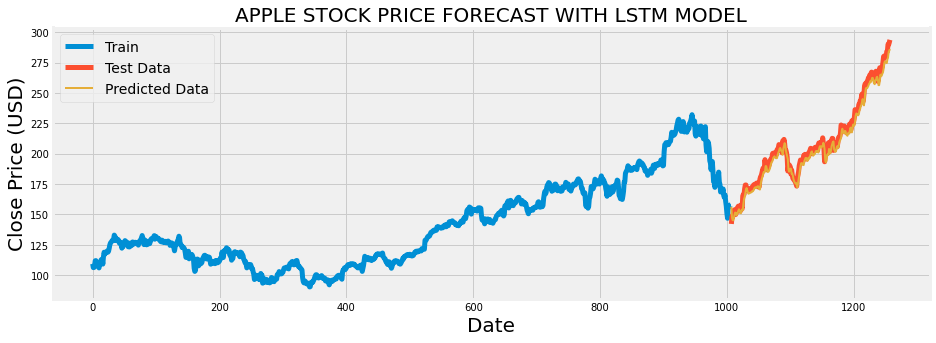

In [38]:
#plot the data
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions
#training_data_len = training_data_len - 100
validate = data[754:1007]
#print(training_data_len )

#Visualize
plt.figure(figsize = (14,5))
plt.title('APPLE STOCK PRICE FORECAST WITH LSTM MODEL', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Close Price (USD)', fontsize = 20)

plt.plot(train['Close'], linewidth=5.0)
plt.plot(test[['Close']], linewidth=5.0)
plt.plot(test[['Predictions']], linewidth=2.0)
plt.legend(['Train', 'Test Data', 'Predicted Data'], loc = 'upper left', fontsize=14)
plt.show()

In [39]:
#Show the valid and predicted prices
comp = [test[['Close']], test[['Predictions']] ]
comp

[           Close
 1007  142.190002
 1008  148.259995
 1009  147.929993
 1010  150.750000
 1011  153.309998
 ...          ...
 1253  284.269989
 1254  289.910004
 1255  289.799988
 1256  291.519989
 1257  293.649994
 
 [251 rows x 1 columns],       Predictions
 1007   156.260330
 1008   147.393799
 1009   145.294968
 1010   145.175613
 1011   147.147430
 ...           ...
 1253   277.637573
 1254   279.117554
 1255   283.532227
 1256   284.881012
 1257   286.084808
 
 [251 rows x 1 columns]]

In [40]:
#Get the Root Mean Squared Error(RMSE) and Accuracy
mse = np.mean(predictions - y_test)**2
rmse = np.sqrt(mse)
acc=100-rmse

print("The MEAN SQUARE ERROR of the Model is: ",mse)
print("The ROOT MEAN SQUARE ERROR of the Model is: ",rmse)
print("The ACCURACY of the Model is: ",acc,"%")

The MEAN SQUARE ERROR of the Model is:  12.637322396983972
The ROOT MEAN SQUARE ERROR of the Model is:  3.554901179636921
The ACCURACY of the Model is:  96.44509882036309 %
